---------------------------------TABLERO INICIAL--------------------------------


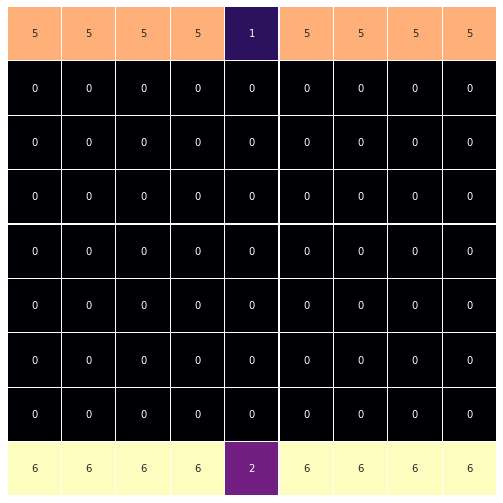




 ---------------------------------------------DATOS GENERALES -------------------------------------


Posicion del primer jugador =>  (0, 4)
Posicion del segundo jugador =>  (8, 4)
Posicion del tercero jugador =>  (4, 0)
Posicion del cuarto jugador =>  (4, 8)
Tamaño del tablero =>  9
Movimientos reaalizados Primer Jugador: LLLLDDDDDDDD
Movimientos reaalizados Segundo Jugador: RRRRUUUUUUUU
-----------EL GANADOR ES EL PRIMER JUGADOR------------
Con una cantidad de movimientos =>  13


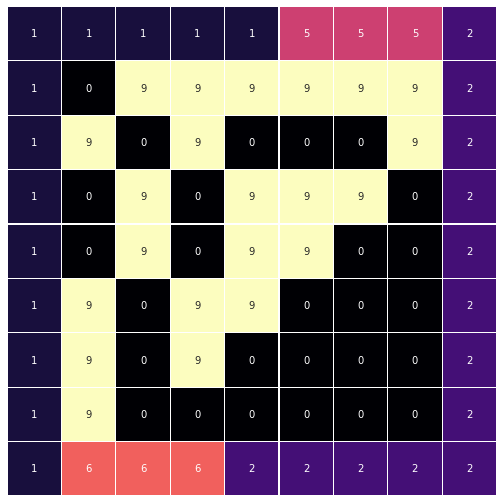



El tiempo es =>  51003.19457054138 segundos


In [3]:
#*****************************************************************************BIBLIOTECA******************************************************************#

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import time
import queue

#******************************************************************************TABLERO*******************************************************************#

class Tablero:
  def __init__(self, n : int):
    self.tamanio = n
    self.matriz = np.zeros(shape=(self.tamanio,self.tamanio)).astype(int)
    self.pos_jugador = (-1,-1)
    self.pos_jugador_segundo = (-1,-1)
    self.pos_jugador_tercero = (-1,-1)
    self.pos_jugador_cuarto = (-1,-1)

  def Generar_Tablero(self):

    self.matriz[0][:] = 5
    self.matriz[self.tamanio - 1][:] = 6

    pos_x = self.tamanio // 2
    pos_y = 0

    pos_x_p2 = self.tamanio // 2
    pos_y_p2 = self.tamanio - 1

    pos_x_p3 = 0
    pos_y_p3 = self.tamanio // 2

    pos_x_p4 = self.tamanio - 1
    pos_y_p4 = self.tamanio // 2

    self.matriz[pos_y,pos_x] = 1
    self.matriz[pos_y_p2,pos_x_p2] = 2


    self.pos_jugador = (pos_y,pos_x)
    self.pos_jugador_segundo = (pos_y_p2,pos_x_p2)
    self.pos_jugador_tercero = (pos_y_p3,pos_x_p3)
    self.pos_jugador_cuarto = (pos_y_p4,pos_x_p4)


    return self.matriz

  def Dibujar_Tablero(self):
    plt.figure(figsize=(np.size(self.matriz,0),np.size(self.matriz,1)))
    sns.heatmap(self.matriz, linewidths=.1, linecolor='white',annot=False, cmap='magma', yticklabels=False,xticklabels=False, cbar=False, square=True);
    sns.heatmap(self.matriz, linewidths=.1, linecolor='white',annot=True, cmap='magma', yticklabels=False,xticklabels=False, cbar=False, square=True,
                mask=np.array(self.matriz)<0);
    plt.show()

  def get_pos(self):
    return self.pos_jugador
  
  def get_pos_segundo(self):
    return self.pos_jugador_segundo

  def get_pos_tercero(self):
    return self.pos_jugador_tercero

  def get_pos_cuarto(self):
    return self.pos_jugador_cuarto

  def get_tamanio(self):
    return self.tamanio

  def get_matriz(self):
    return self.matriz 


#***************************************************************************SOLUCION******************************************************************************#

class Solucion:
  def __init__(self, mesa : Tablero):
    self.matriz = mesa.get_matriz()
    self.tamanio = mesa.get_tamanio()
    self.mesa = mesa
    self.mov_pl1 = 0
    self.mov_pl2 = 0

  def Validacion(self, jugador, movimientos): 
    if jugador == 1:
      for x, posicion in enumerate(self.matriz[0]):
        if posicion == 1:
          inicio = x

      i = inicio
      j = 0

      for mover in movimientos:
        if mover == 'L':
          i -= 1
        elif mover == 'R':
          i += 1
        elif mover == 'U':
          j -= 1
        elif mover == 'D':
          j += 1

      if not (0 <= i < len(self.matriz[0]) and 0 <= j < len(self.matriz)):
        return False
      elif self.matriz[j][i] == 9:
        return False
      return True

    if jugador == 2:
      for x, posicion in enumerate(self.matriz[self.tamanio -1]):
        if posicion == 2:
          inicio = x

      i = inicio
      j = self.tamanio - 1

      for mover in movimientos:
        if mover == 'L':
          i -= 1
        elif mover == 'R':
          i += 1
        elif mover == 'U':
          j -= 1
        elif mover == 'D':
          j += 1

      if not (0 <= i < len(self.matriz[0]) and 0 <= j < len(self.matriz)):
        return False
      elif self.matriz[j][i] == 9:
        return False
      return True

  def Mostrar_Camino(self, jugador, movimientos = ""):
    if jugador == 1:
      for x, posicion in enumerate(self.matriz[0]):
        if posicion == 1:
          inicio = x

      i = inicio
      j = 0

      posicion = set()

      for mover in movimientos:
        if mover == 'L':
          i -= 1
        elif mover == 'R':
          i += 1
        elif mover == 'U':
          j -= 1
        elif mover == 'D':
          j += 1
        posicion.add((j,i))

      for j, row in enumerate(self.matriz):
        for i, col in enumerate(row):
          if (j,i) in posicion:
            self.matriz[j,i] = 1

    if jugador == 2:
      for x, posicion in enumerate(self.matriz[self.tamanio - 1]):
        if posicion == 2:
          inicio = x

      i = inicio
      j = self.tamanio - 1

      posicion = set()

      for mover in movimientos:
        if mover == 'L':
          i -= 1
        elif mover == 'R':
          i += 1
        elif mover == 'U':
          j -= 1
        elif mover == 'D':
          j += 1
        posicion.add((j,i))

      for j, row in enumerate(self.matriz):
        for i, col in enumerate(row):
          if (j,i) in posicion:
            self.matriz[j,i] = 2


  def Buscar_Camino(self,jugador, movimientos):
    if jugador == 1:
      for x, posicion in enumerate(self.matriz[0]):
        if posicion == 1:
          inicio = x

      i = inicio
      j = 0

      for mover in movimientos:
        if mover == 'L':
          i -= 1
        elif mover == 'R':
          i += 1
        elif mover == 'U':
          j -= 1
        elif mover == 'D':
          j += 1

      if self.matriz[j][i] == 6:
        print("Movimientos reaalizados Primer Jugador: " + movimientos)
        self.Mostrar_Camino(1, movimientos)
        return True
      return False         

    if jugador == 2:

      for x, posicion in enumerate(self.matriz[self.tamanio - 1]):
        if posicion == 2:
          inicio = x

      i = inicio
      j = self.tamanio - 1

      for mover in movimientos:
        if mover == 'L':
          i -= 1
        elif mover == 'R':
          i += 1
        elif mover == 'U':
          j -= 1
        elif mover == 'D':
          j += 1

      if self.matriz[j][i] == 5:
        print("Movimientos reaalizados Segundo Jugador: " + movimientos)
        self.Mostrar_Camino(2, movimientos)
        return True
      return False   

  def Paredes(self):
    j = self.mesa.get_tamanio() - 1
    for i in range(1,j):
      pos = self.mesa.get_tamanio() - 1

      pos1 = random.randint(1, pos - 1)
      pos2 = random.randint(1, pos - 2)

      self.matriz[i][random.randint(1, pos1)] = 9
      self.matriz[i][random.randint(1, pos1 + 1)] = 9

      self.matriz[random.randint(1, pos1)][i] = 9
      self.matriz[random.randint(1, pos1 + 1)][i] = 9

  def Jugadas(self):

    self.Paredes()

    cola = queue.Queue()
    cola.put("")
    agregar = ""

    while not self.Buscar_Camino(1, agregar): 
      agregar = cola.get()
      for j in ['L', 'R', 'U', 'D']:
        put = agregar + j
        if self.Validacion(1, put):
          cola.put(put) 
    
    self.mov_pl1 = len(put)

    cola = queue.Queue()
    cola.put("")
    agregar = ""

    while not self.Buscar_Camino(2, agregar): 
      agregar = cola.get()
      for j in ['L', 'R', 'U', 'D']:
        put = agregar + j
        if self.Validacion(2, put):
          cola.put(put) 

    self.mov_pl2 = len(put)

  def Ganador(self):
    Ganador = [self.mov_pl1, self.mov_pl2]
    minimo = min(Ganador)

    if minimo == self.mov_pl1:
      print("-----------EL GANADOR ES EL PRIMER JUGADOR------------")
      print("Con una cantidad de movimientos => ", self.mov_pl1)
    else :
      print("-----------EL GANADOR ES EL SEGUNDO JUGADOR------------")
      print("Con una cantidad de movimientos => ", self.mov_pl2)
#****************************************************************************TIEMPO************************************************************************#

def Tiempo(main,tamanio):
  inicio = time.time()
  main(tamanio)
  final = time.time()
  return (final - inicio) * 1000

#***************************************************************************MAIN********************************************************************************#
def main(tamanio):
  mesa = Tablero(tamanio)
  mesa.Generar_Tablero()

  print("---------------------------------TABLERO INICIAL--------------------------------")
  mesa.Dibujar_Tablero()

  print("\n\n\n ---------------------------------------------DATOS GENERALES -------------------------------------")
  print("\n\nPosicion del primer jugador => ", mesa.get_pos())
  print("Posicion del segundo jugador => ", mesa.get_pos_segundo())
  print("Posicion del tercero jugador => ", mesa.get_pos_tercero())
  print("Posicion del cuarto jugador => ", mesa.get_pos_cuarto())
  print("Tamaño del tablero => ", mesa.get_tamanio())

  back = Solucion(mesa)

  back.Jugadas()
  back.Ganador()


  mesa.Dibujar_Tablero()
#*************************************************************************************RESULTADO*********************************************************************#

print("\n\nEl tiempo es => ", Tiempo(main,9), "segundos")